Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
%matplotlib inline
from imblearn.over_sampling import SMOTE
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from prettytable import PrettyTable
from sklearn.preprocessing import FunctionTransformer,PowerTransformer

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [4]:
data_2=data.drop(['id'],axis=1)
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [5]:
data['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

In [6]:
def feature_enginnering(data_1,data_2):
    data_2['mean']=np.mean(data_1,axis=1)
    data_2['std_dev']=np.std(data_1,axis=1)
    data_2['variance']=np.var(data_1,axis=1)
    data_2['median']=np.median(data_1,axis=1)
    
    sine_standard_scaler=np.sin(data_1)
    cosine_standard_scaler=np.cos(data_1)
    tan_standard_scaler=np.tan(data_1)
    sinh_standard_scaler=np.sinh(data_1)
    cosh_standard_scaler=np.cosh(data_1)
    tanh_standard_scaler=np.tanh(data_1)
    
    data_2['sine']=np.mean(sine_standard_scaler,axis=1)
    data_2['cosine']=np.mean(cosine_standard_scaler,axis=1)
    data_2['tan']=np.mean(tan_standard_scaler,axis=1)
    data_2['sinh']=np.mean(sinh_standard_scaler,axis=1)
    data_2['cosh']=np.mean(cosh_standard_scaler,axis=1)
    data_2['tanh']=np.mean(tanh_standard_scaler,axis=1)

    data_2['std_sine']=np.std(sine_standard_scaler,axis=1)
    data_2['std_cosine']=np.std(cosine_standard_scaler,axis=1)
    data_2['std_tan']=np.std(tan_standard_scaler,axis=1)
    data_2['std_sinh']=np.std(sinh_standard_scaler,axis=1)
    data_2['std_cosh']=np.std(cosh_standard_scaler,axis=1)
    data_2['std_tanh']=np.std(tanh_standard_scaler,axis=1)


    data_2['var_sine']=np.var(sine_standard_scaler,axis=1)
    data_2['var_cosine']=np.var(cosine_standard_scaler,axis=1)
    data_2['var_tan']=np.var(tan_standard_scaler,axis=1)
    data_2['var_sinh']=np.var(sinh_standard_scaler,axis=1)
    data_2['var_cosh']=np.var(cosh_standard_scaler,axis=1)
    data_2['var_tanh']=np.var(tanh_standard_scaler,axis=1)


    data_2['median_sine']=np.median(sine_standard_scaler,axis=1)
    data_2['median_cosine']=np.median(cosine_standard_scaler,axis=1)
    data_2['median_tan']=np.median(tan_standard_scaler,axis=1)
    data_2['median_sinh']=np.median(sinh_standard_scaler,axis=1)
    data_2['mediam_cosh']=np.median(cosh_standard_scaler,axis=1)
    data_2['median_tanh']=np.median(tanh_standard_scaler,axis=1)


    data_2['mean_square']=np.mean(np.power(data_1,2),axis=1)
    data_2['mean_cube']=np.mean(np.power(data_1,3),axis=1)
    data_2['mean_four']=np.mean(np.power(data_1,4),axis=1)
    
    exp_standard_scaler=np.exp(data_1)
    exp2_standard_scaler=np.exp2(data_1)
    expm1_standard_scaler=np.expm1(data_1)
    
    data_2['mean_exp']=np.mean(exp_standard_scaler,axis=1)
    data_2['mean_exp2']=np.mean(exp2_standard_scaler,axis=1)
    data_2['mean_expm']=np.mean(expm1_standard_scaler,axis=1)

    data_2['median_exp']=np.median(exp_standard_scaler,axis=1)
    data_2['median_exp2']=np.median(exp2_standard_scaler,axis=1)
    data_2['median_expm']=np.median(expm1_standard_scaler,axis=1)

    data_2['std_exp']=np.std(exp_standard_scaler,axis=1)
    data_2['std_exp2']=np.std(exp2_standard_scaler,axis=1)
    data_2['std_expm']=np.std(expm1_standard_scaler,axis=1)


    data_2['var_exp']=np.var(exp_standard_scaler,axis=1)
    data_2['var_exp2']=np.var(exp2_standard_scaler,axis=1)
    data_2['var_expm']=np.var(expm1_standard_scaler,axis=1)
    
    # calcualting mean absolute deviation
    data_2['mad']=data_1.mad(axis=1)
    
    data_new=pd.DataFrame()
    for i in data_1.columns.values:
        data_new[int(i)]=data_1.iloc[:,int(i)]+abs(data_1.iloc[:,int(i)].min())     
    data_new_square=np.sqrt(data_new)
    data_2['square_root_mean']=np.mean(data_new,axis=1)
    data_2['square_root_median']=np.median(data_new,axis=1)
    data_2['square_root_std_dev']=np.std(data_new,axis=1)
    data_2['square_root_var']=np.var(data_new,axis=1)
    
    return data_2
    

In [7]:
data_2.head(2)

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [8]:
y=data_2['target'].values
X=data_2.drop(['target'],axis=1)

In [9]:
X.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)
print((X_train.shape),y_train.shape)
print((X_test.shape),y_test.shape)

(175, 300) (175,)
(75, 300) (75,)


In [11]:
def standard_scaler(X_train,X_test):
    standard_scaler=StandardScaler()
    X_train=standard_scaler.fit_transform(X_train)
    X_test=standard_scaler.transform(X_test)
    data_train=pd.DataFrame(X_train)
    data_test=pd.DataFrame(X_test)
    
    return X_train,X_test,data_train,data_test

In [12]:
def oversampled_ss(X_train,y_train):
    smote=SMOTE()
    X_train_os,y_train_os=smote.fit_resample(X_train,y_train)
    return X_train_os,y_train_os

In [13]:
X_train_ss,X_test_ss,df_train_ss,df_test_ss=standard_scaler(X_train,X_test)

In [14]:
df_train_ss.head(2)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.889812,0.645030,0.812990,-0.108914,2.262384,0.371064,0.094297,0.128186,-0.785219,-1.623767,...,-1.416144,-0.481301,-0.414195,-0.246371,0.987965,-0.472384,0.265993,-0.726586,0.808035,0.873232
1,0.318855,0.528741,-1.923252,-0.557782,-0.090918,0.581112,-1.432389,0.371111,-1.407422,0.351006,...,-1.242944,-1.254830,0.481473,0.466551,0.741324,-1.719410,-0.118657,-0.484095,-1.948296,-0.107088


In [15]:
def parameters_models(model,param,X,y):
    best_cv=StratifiedKFold(n_splits=7)
    classifier=GridSearchCV(model,param,cv=best_cv,n_jobs=-1,scoring='roc_auc',return_train_score=True,verbose=1)
    classifier.fit(X,y)
    train_auc=classifier.cv_results_['mean_train_score']
    train_auc_std=classifier.cv_results_['std_train_score']
    cv_auc = classifier.cv_results_['mean_test_score'] 
    cv_auc_std= classifier.cv_results_['std_test_score']

    print("best alpha/parameter",classifier.best_params_)
    
    return classifier
    

In [16]:
def roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred):

    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

    plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False positive rate(FPR)")
    plt.ylabel("True positive rate(TPR)")
    plt.title("AUC")
    plt.grid()
    plt.show()

In [17]:
def feature_selection(model,X,y):
    rfecv=RFECV(model,step=1,min_features_to_select=40,cv=best_cv,verbose=1,scoring='roc_auc',n_jobs=-1)
    rfecv.fit(X,y)
    print("Optimal Feature",rfecv.n_features_)
    print("Feature_names",rfecv.get_feature_names_out())
    
    return rfecv.support_
    

In [18]:
def box_cox_transformation(train_dataframe,test_dataframe):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_test_box=power_transformer.transform(test_dataframe)
    
    return final_dataframe_train_box,final_dataframe_test_box

## Decison Tree classifier using RFECV

In [19]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=7)

In [20]:
rfecv=feature_selection(decision_tree,X_train_ss,y_train)

Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Optimal Feature 277
Feature_names ['x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x33'
 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x40'

In [21]:
print(rfecv)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  T

In [22]:
df_train_reduced=df_train_ss[df_train_ss.columns[rfecv]]
df_train_reduced.shape

(175, 277)

In [23]:
df_test_reduced=df_test_ss[df_train_ss.columns[rfecv]]
df_test_reduced.shape

(75, 277)

In [24]:
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(df_train_reduced,y_train)

DecisionTreeClassifier()

In [25]:
y_train_pred=decision_tree_model.predict_proba(df_train_reduced)
y_train_pred = y_train_pred[:, 1]

y_test_pred=decision_tree_model.predict_proba(df_test_reduced)
y_test_pred=y_test_pred[:,1]


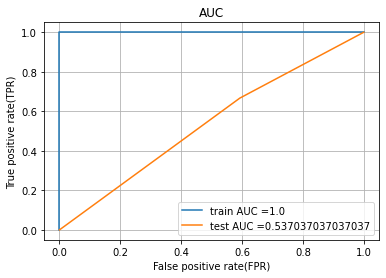

In [26]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Decision Tree Using hyperparameter

In [27]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[2,3,4,5],'min_samples_split':[5,10,50],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy']}
classifier=parameters_models(decision_tree,param,df_train_reduced,y_train)
print(classifier)

Fitting 7 folds for each of 72 candidates, totalling 504 fits
best alpha/parameter {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 50}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 10, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [28]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_features=classifier.best_params_['max_features'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])
decision_tree_model.fit(df_train_reduced,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_split=50)

In [29]:
y_train_pred=decision_tree_model.predict_proba(df_train_reduced)
y_train_pred = y_train_pred[:, 1]

y_test_pred=decision_tree_model.predict_proba(df_test_reduced)
y_test_pred=y_test_pred[:,1]


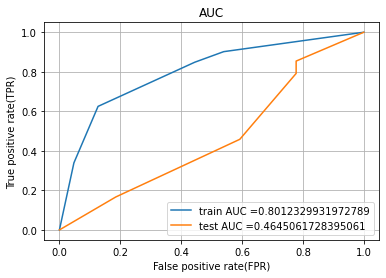

In [30]:
roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Feature Enginnering

This transformation is explained in EDA video and classroom classes by appliedaicourse under logistic regression module. https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3025/non-linearly-separable-data-feature-engineering/3/module-3-foundations-of-natural-language-processing-and-machine-learning

Feature enginnering on train dataset

In [31]:
df_train_feature_eng=pd.DataFrame()
df_train_feature_eng=feature_enginnering(df_train_ss,df_train_feature_eng)
df_train_feature_eng.shape

(175, 48)

Feature enginnering on test Dataset

In [32]:
df_test_feature_eng=pd.DataFrame()
df_test_feature_eng=feature_enginnering(df_test_ss,df_test_feature_eng)
df_test_feature_eng.shape

(75, 48)

## Merging of Features

Merging of features we get from decision tree and enginnered features

In [33]:
frames1=[df_train_feature_eng,df_train_reduced]
final_dataframe_train=pd.concat(frames1,axis=1)

frames=[df_test_feature_eng,df_test_reduced]
final_dataframe_test=pd.concat(frames,axis=1)

In [34]:
final_dataframe_train.shape

(175, 325)

In [35]:
final_dataframe_test.shape

(75, 325)

# Checking nan and infinity values

In [36]:
final_dataframe_train.isna().sum()

mean        0
std_dev     0
variance    0
median      0
sine        0
           ..
295         0
296         0
297         0
298         0
299         0
Length: 325, dtype: int64

In [37]:
final_dataframe_train.isin([-np.inf]).sum()

mean        0
std_dev     0
variance    0
median      0
sine        0
           ..
295         0
296         0
297         0
298         0
299         0
Length: 325, dtype: int64

In [38]:
final_dataframe_test.isna().sum()

mean        0
std_dev     0
variance    0
median      0
sine        0
           ..
295         0
296         0
297         0
298         0
299         0
Length: 325, dtype: int64

In [39]:
final_dataframe_test.isin([-np.inf]).sum()

mean        0
std_dev     0
variance    0
median      0
sine        0
           ..
295         0
296         0
297         0
298         0
299         0
Length: 325, dtype: int64

## Feature Transformation

BoxCox Transformation

In [40]:
final_dataframe_train_box_cox,final_dataframe_test_box_cox=box_cox_transformation(final_dataframe_train,final_dataframe_test)

In [41]:
final_dataframe_train_box_cox.shape

(175, 325)

In [42]:
final_dataframe_test_box_cox.shape

(75, 325)

Logistic Regression

In [43]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,final_dataframe_train_box_cox,y_train)
print(classifier)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [44]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
log_reg_model.fit(final_dataframe_train_box_cox,y_train)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [45]:
y_train_pred=log_reg_model.predict_proba(final_dataframe_train_box_cox)
y_train_pred = y_train_pred[:, 1]

y_test_pred=log_reg_model.predict_proba(final_dataframe_test_box_cox)
y_test_pred=y_test_pred[:,1]

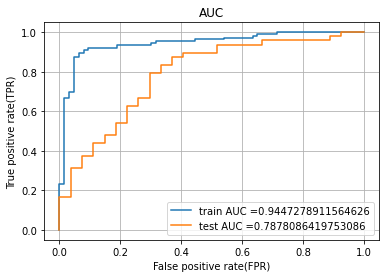

In [46]:
roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Random Forest

In [47]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[5,10,20],'max_depth':[2,3,5],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,final_dataframe_train_box_cox,y_train)
print(classifier)

Fitting 7 folds for each of 432 candidates, totalling 3024 fits
best alpha/parameter {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 10}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 20]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [48]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )
random_forest_model.fit(final_dataframe_train_box_cox,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=None,
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=10)

In [49]:
y_train_pred=random_forest_model.predict_proba(final_dataframe_train_box_cox)
y_train_pred = y_train_pred[:, 1]

y_test_pred=random_forest_model.predict_proba(final_dataframe_test_box_cox)
y_test_pred=y_test_pred[:,1]


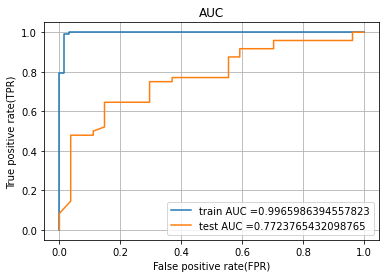

In [50]:
roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

Xgboost

In [51]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[5,10,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5,1],
        'subsample':[0.1,0.3,0.5,1]
}
classifier=parameters_models(xgb,param,final_dataframe_train_box_cox,y_train)
print(classifier)

Fitting 7 folds for each of 864 candidates, totalling 6048 fits
[16:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 10, 'subsample': 0.5}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                           

In [52]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_model.fit(final_dataframe_train_box_cox,y_train)

[16:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [53]:
y_train_pred=xgb_model.predict_proba(final_dataframe_train_box_cox)
y_train_pred = y_train_pred[:, 1]

y_test_pred=xgb_model.predict_proba(final_dataframe_test_box_cox)
y_test_pred=y_test_pred[:,1]

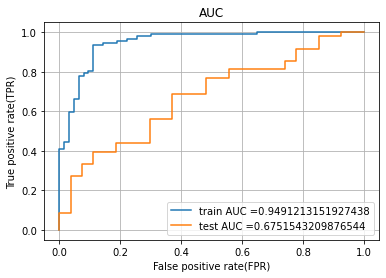

In [54]:
roc_auc_curve(y_train,y_train_pred,y_test,y_test_pred)

## Standardization With Oversampling

In [55]:
X_train_os,y_train_os=oversampled_ss(X_train,y_train)

In [56]:
X_train_os_ss,X_test_ss,df_train_os_ss,df_test_ss=standard_scaler(X_train_os,X_test)

In [57]:
df_train_os_ss.shape

(224, 300)

In [58]:
df_test_ss.shape

(75, 300)

## Decision Tree with Oversampling using RFECV

In [59]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=7)

In [60]:
rfecv=feature_selection(decision_tree,X_train_os_ss,y_train_os)

Fitting estimator with 300 features.
Fitting estimator with 299 features.
Fitting estimator with 298 features.
Fitting estimator with 297 features.
Fitting estimator with 296 features.
Fitting estimator with 295 features.
Fitting estimator with 294 features.
Fitting estimator with 293 features.
Fitting estimator with 292 features.
Fitting estimator with 291 features.
Fitting estimator with 290 features.
Fitting estimator with 289 features.
Fitting estimator with 288 features.
Fitting estimator with 287 features.
Fitting estimator with 286 features.
Fitting estimator with 285 features.
Fitting estimator with 284 features.
Fitting estimator with 283 features.
Fitting estimator with 282 features.
Fitting estimator with 281 features.
Fitting estimator with 280 features.
Fitting estimator with 279 features.
Fitting estimator with 278 features.
Fitting estimator with 277 features.
Fitting estimator with 276 features.
Fitting estimator with 275 features.
Fitting estimator with 274 features.
F

Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Optimal Feature 72
Feature_names ['x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25' 'x26' 'x27' 'x28' 'x29'
 'x30' 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37' 'x38' 'x39' 'x40' 'x41'
 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49' 'x133' 'x138' 'x152'
 'x175' 'x201' 'x202' 'x203' 'x204' 'x205' 'x206' 'x207' 'x208' 'x209'
 'x210' 'x211' 'x212' 'x213' 'x214' 'x215' 'x216' 'x217' 'x218' 'x219'
 'x220' 'x221' 'x222' 'x223' 'x224' 'x225' 'x226' 'x227' 'x228' 'x229'
 'x230' 'x244' 'x289' 'x295' 'x296' 'x297' 'x298']


In [61]:
df_train_reduced_os=df_train_os_ss[df_train_os_ss.columns[rfecv]]
df_train_reduced_os.shape

(224, 72)

In [62]:
df_test_reduced_os=df_test_ss[df_train_os_ss.columns[rfecv]]
df_test_reduced_os.shape

(75, 72)

In [63]:
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(df_train_reduced_os,y_train_os)

DecisionTreeClassifier()

In [64]:
y_train_pred=decision_tree_model.predict_proba(df_train_reduced_os)
y_train_pred = y_train_pred[:, 1]

y_test_pred=decision_tree_model.predict_proba(df_test_reduced_os)
y_test_pred=y_test_pred[:,1]

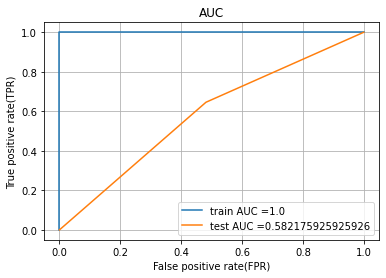

In [65]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_os, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate(FPR)")
plt.ylabel("True positive rate(TPR)")
plt.title("AUC")
plt.grid()
plt.show()

## Decison Tree using Hyperparameter with Oversampling

In [66]:
decision_tree=DecisionTreeClassifier(class_weight='balanced')
param={'max_depth':[2,3,4,5],'min_samples_split':[5,10,50],'max_features': ['auto', 'sqrt', 'log2'],'criterion': ['gini', 'entropy']}
classifier=parameters_models(decision_tree,param,df_train_reduced_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 72 candidates, totalling 504 fits
best alpha/parameter {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 10, 50]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [67]:
decision_tree_model=DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'],max_features=classifier.best_params_['max_features'],
                                          min_samples_split=classifier.best_params_['min_samples_split'],criterion=classifier.best_params_['criterion'])
decision_tree_model.fit(df_train_reduced_os,y_train_os)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_split=10)

In [68]:
y_train_pred=decision_tree_model.predict_proba(df_train_reduced_os)
y_train_pred = y_train_pred[:, 1]

y_test_pred=decision_tree_model.predict_proba(df_test_reduced_os)
y_test_pred=y_test_pred[:,1]

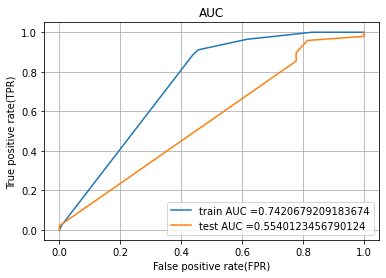

In [69]:
roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

## Feature Enginnering with Oversampling

Feature enginnering of oversampled train dataset

In [70]:
df_train_os_ss.shape

(224, 300)

In [71]:
df_test_ss.shape

(75, 300)

In [72]:
df_train_feature_eng_os=pd.DataFrame()
df_train_feature_eng_os=feature_enginnering(df_train_os_ss,df_train_feature_eng_os)
df_train_feature_eng_os.shape

(224, 48)

Feature enginnering of oversampled test dataset

In [73]:
df_test_feature_eng_os=pd.DataFrame()
df_test_feature_eng_os=feature_enginnering(df_test_ss,df_test_feature_eng_os)
df_test_feature_eng_os.shape

(75, 48)

## Merging of Features

In [74]:
frames1=[df_train_feature_eng_os,df_train_reduced_os]
final_dataframe_train_os=pd.concat(frames1,axis=1)

In [75]:
frames=[df_test_feature_eng_os,df_test_reduced_os]
final_dataframe_test_os=pd.concat(frames,axis=1)

In [76]:
final_dataframe_train_os.shape

(224, 120)

In [77]:
final_dataframe_test_os.shape

(75, 120)

## Feature Transformation

BoxCox Transformation

In [78]:
final_dataframe_train_box_cox_os,final_dataframe_test_box_cox_os=box_cox_transformation(final_dataframe_train_os,final_dataframe_test_os)

In [79]:
final_dataframe_train_box_cox_os.shape

(224, 120)

In [80]:
final_dataframe_test_box_cox_os.shape

(75, 120)

Logistic Regression

In [81]:
log_reg=LogisticRegression(class_weight='balanced')
param={'C': [0.001,0.01,0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear']}
classifier=parameters_models(log_reg,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
best alpha/parameter {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [82]:
log_reg_model=LogisticRegression(C=classifier.best_params_['C'], class_weight='balanced',
                   solver=classifier.best_params_['solver'],penalty=classifier.best_params_['penalty'])
log_reg_model.fit(final_dataframe_train_box_cox_os,y_train_os)

LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')

In [83]:
y_train_pred=log_reg_model.predict_proba(final_dataframe_train_box_cox_os)
y_train_pred = y_train_pred[:, 1]

y_test_pred=log_reg_model.predict_proba(final_dataframe_test_box_cox_os)
y_test_pred=y_test_pred[:,1]

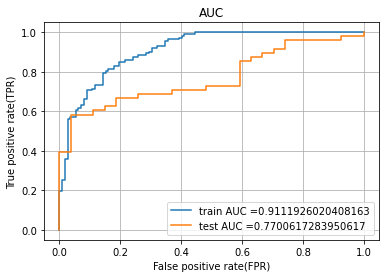

In [84]:
roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Random Forest

In [85]:
random_forest=RandomForestClassifier(class_weight='balanced')
param = {'n_estimators':[5,10,20],'max_depth':[2,3,5],'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[3,4,5,6],'max_features':['sqrt', 'log2', None]}
classifier=parameters_models(random_forest,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 432 candidates, totalling 3024 fits
best alpha/parameter {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 20}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 20]},
             return_train_score=True, scoring='roc_auc', verbose=1)


In [86]:
random_forest_model=RandomForestClassifier(class_weight='balanced', max_depth=classifier.best_params_['max_depth'], min_samples_leaf=classifier.best_params_['min_samples_leaf'],
                       min_samples_split=classifier.best_params_['min_samples_split'], n_estimators=classifier.best_params_['n_estimators'],
                       max_features=classifier.best_params_['max_features']                  )
random_forest_model.fit(final_dataframe_train_box_cox_os,y_train_os)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=None,
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=20)

In [87]:
y_train_pred=random_forest_model.predict_proba(final_dataframe_train_box_cox_os)
y_train_pred = y_train_pred[:, 1]

y_test_pred=random_forest_model.predict_proba(final_dataframe_test_box_cox_os)
y_test_pred=y_test_pred[:,1]

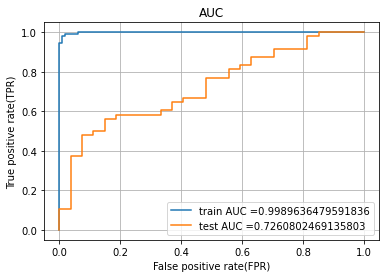

In [88]:
roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

Xgboost

In [89]:
xgb=XGBClassifier()
param= {
        'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators':[5,10,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5,1],
        'subsample':[0.1,0.3,0.5,1]
}
classifier=parameters_models(xgb,param,final_dataframe_train_box_cox_os,y_train_os)
print(classifier)

Fitting 7 folds for each of 864 candidates, totalling 6048 fits
[16:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best alpha/parameter {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20, 'subsample': 1}
GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                               

In [90]:
xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_model.fit(final_dataframe_train_box_cox_os,y_train_os)

[16:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
y_train_pred=xgb_model.predict_proba(final_dataframe_train_box_cox_os)
y_train_pred = y_train_pred[:, 1]

y_test_pred=xgb_model.predict_proba(final_dataframe_test_box_cox_os)
y_test_pred=y_test_pred[:,1]

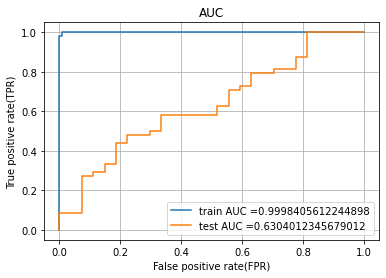

In [92]:
roc_auc_curve(y_train_os,y_train_pred,y_test,y_test_pred)

In [ ]:
table=PrettyTable(['classifier','feature selection','Hyperparameter Tuning','oversampling','transformation','train_auc','test_auc'])
table.add_row(['Decision_Tree','RFECV','no','no','no',1.0,0.5370])
table.add_row(['Decision_Tree','no','yes','no','no',0.8012,0.4645])
table.add_row(['Logistic_Regression','yes','yes','no','yes_box_cox',0.9447,0.7878])
table.add_row(['Random_Forest','yes','yes','no','yes_box_cox',0.9965,0.7723])
table.add_row(['Xgboost','yes','yes','no','yes_box_cox',0.9491,0.6751])
table.add_row(['Decison_Tree','yes','no','yes','no',1.0,0.5821])
table.add_row(['Decision_Tree','yes','yes','yes','no',0.7420,0.5540])
table.add_row(['Logistic_Regression','yes','yes','yes','yes_box_cox',0.9111,0.7700])
table.add_row(['Random_Forest','yes','yes','yes','yes_box_cox',0.9984,0.7260])
table.add_row(['Xgboost','yes','yes','yes','yes_box_cox',0.9998,0.6304])

print(table)